# AM40UD Understanding Data Coursework: Code

Below is the code used in the coursework report

In [35]:
import pandas as pd

df = pd.read_csv('C://Users/Sam/Downloads/data/data.csv')

df.head()
df.shape

(170653, 19)

In [3]:
df = df.drop(["artists", "id", "name", "release_date"], axis=1)

df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [4]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
dtype: object

In [5]:
df.isnull()
df.isnull().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
dtype: int64

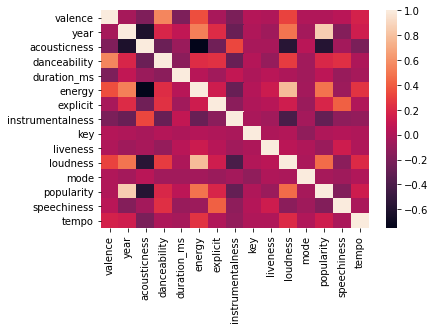

In [6]:
import seaborn as sns

sns.heatmap(df.corr())

Text(0, 0.5, 'Popularity')

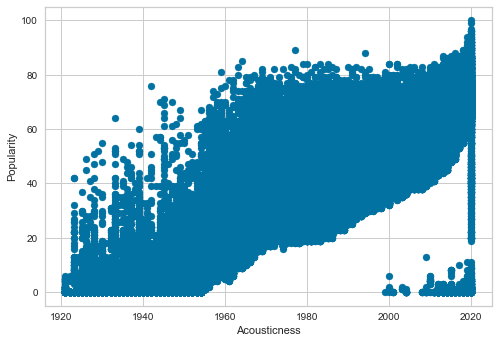

In [56]:
plt.scatter(df["year"], df["popularity"])
plt.xlabel("Acousticness")
plt.ylabel("Popularity")

In [9]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(["year", "popularity"], axis=1)

popularity = df.iloc[:,12]
year = df.iloc[:,1]

min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

Text(0.5, 1.0, 'PCA Plot')

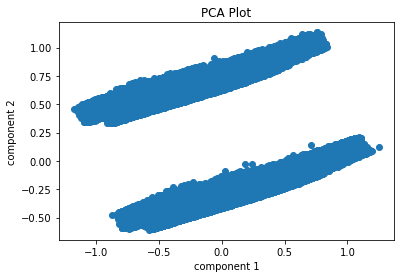

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("PCA Plot")

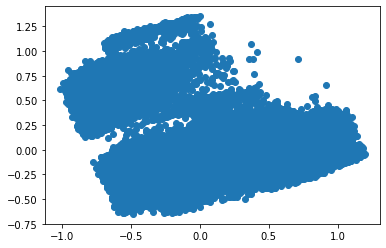

In [12]:
indexes_a = []
indexes_b = []
for ind, i in enumerate(X_pca[:, 1]):
    if i > 0.25:
        indexes_a.append(ind)
    else:
        indexes_b.append(ind)
        
X1 = scaled_data[indexes_a]
X2 = scaled_data[indexes_b]

pca1 = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)
plt.scatter(X1_pca[:,0], X1_pca[:,1])

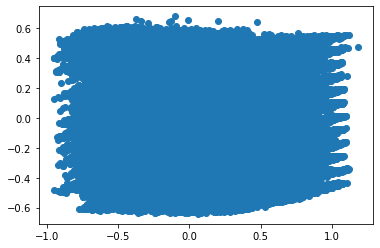

In [13]:
pca2 = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)
plt.scatter(X2_pca[:,0], X2_pca[:,1])

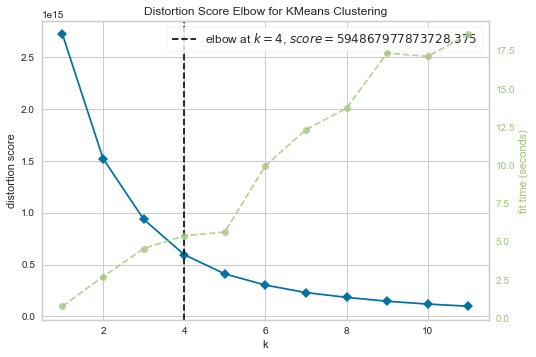

In [14]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(1,12))

visualizer.fit(X)
visualizer.show()    

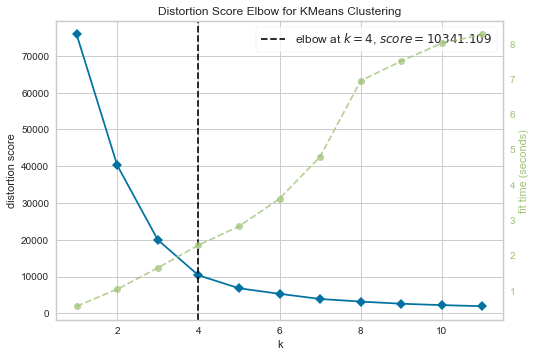

In [15]:
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(1,12))

visualizer.fit(X_pca)
visualizer.show()    

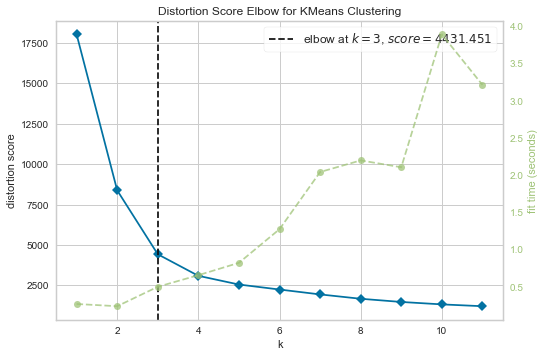

In [16]:
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k=(1,12))

visualizer.fit(X1_pca)
visualizer.show()   

In [17]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
n_clusters=3

def find_clusters(data,n_clusters,rseed=3):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(data.shape[0])[:n_clusters]
    centres = data[i]
    while True:
        labels = pairwise_distances_argmin(data,centres)
        new_centres=np.array([data[labels ==i].mean(0) for i in range(n_clusters)])
    
        if np.all(centres == new_centres):
            break
        centres = new_centres
        
    return centres, labels
    
centres, labels = find_clusters(X_pca,4)

Text(0.5, 1.0, 'PCA Clusters with centres')

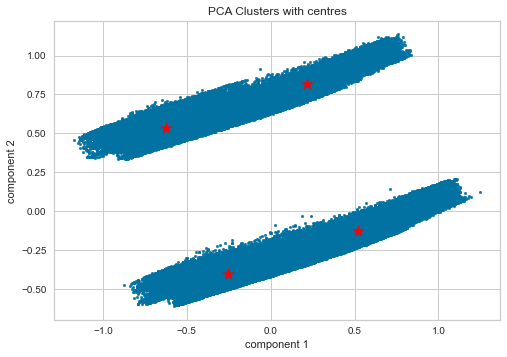

In [18]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=7)
plt.scatter(centres[:,0], centres[:,1], marker='*', c='red', s=150)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("PCA Clusters with centres")

 C:\Users\Sam\anaconda3\lib\site-packages\GPy\util\pca.py:94: MatplotlibDeprecationWarning:Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


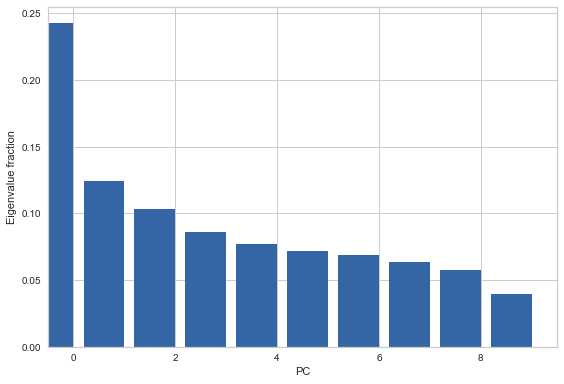

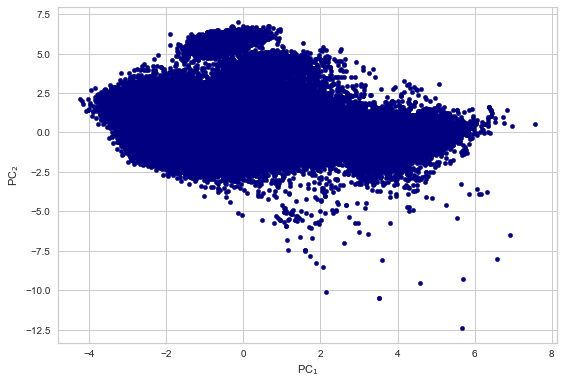

In [19]:
from GPy.util import pca
p=pca.PCA(scaled_data)
p.plot_fracs(10)
p.plot_2d(scaled_data)

In [20]:
#model3 = KMeans()
#visualizer = KElbowVisualizer(model3, k=(1,12))

#visualizer.fit(X1_pca)
#visualizer.show()   
print(p)

In [21]:
scaled_data

array([[0.0594    , 0.98594378, 0.28238866, ..., 1.        , 0.03773196,
        0.3324504 ],
       [0.963     , 0.73493976, 0.82894737, ..., 1.        , 0.42783505,
        0.25024332],
       [0.0394    , 0.96485944, 0.33198381, ..., 1.        , 0.03494845,
        0.45312455],
       ...,
       [0.637     , 0.10140562, 0.6417004 , ..., 0.        , 0.08340206,
        0.37653127],
       [0.195     , 0.01002008, 0.6791498 , ..., 1.        , 0.31752577,
        0.30822523],
       [0.642     , 0.13253012, 0.86639676, ..., 1.        , 0.11134021,
        0.39009556]])

In [24]:
import GPy
import random

data_sample = scaled_data[np.random.choice(scaled_data.shape[0], int(0.01*len(scaled_data)), replace=False), :]
m = GPy.models.bayesian_gplvm_minibatch.BayesianGPLVMMiniBatch(data_sample, 2, num_inducing=30, missing_data=False)

In [25]:
m.optimize(messages=1, max_iters=5e3)

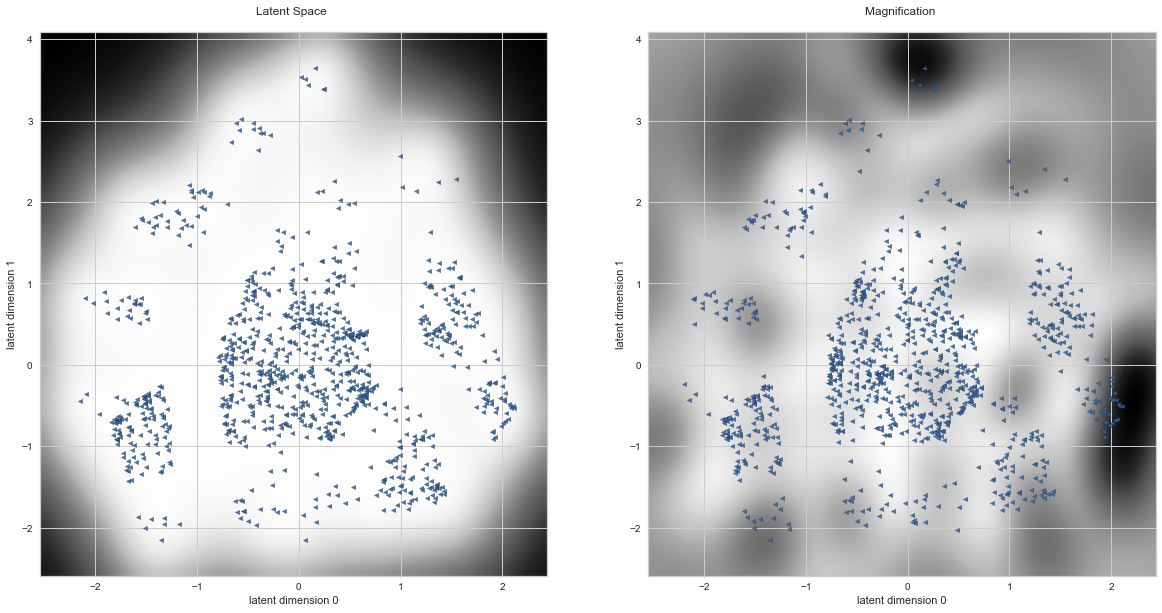

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Latent Space \n')
v1 = m.plot_latent(ax=axes[0], updates=False)
axes[1].set_title('Magnification \n')
v2 = m.plot_magnification(ax=axes[1], updates=False, resolution=120)

In [40]:
kmeans = KMeans(n_clusters=20).fit(scaled_data)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [57]:
import random

index = random.randrange(170654)

df.iloc[random.randrange(170654)]

valence                                                         0.207
year                                                             1958
acousticness                                                    0.798
artists             ['Wolfgang Amadeus Mozart', 'George Szell', 'C...
danceability                                                    0.266
duration_ms                                                    317027
energy                                                         0.0692
explicit                                                            0
id                                             2wXu2k0TvfqEFNRUZikStI
instrumentalness                                                0.709
key                                                                 0
liveness                                                       0.0949
loudness                                                       -22.05
mode                                                                1
name                

In [58]:
distances = []
for i in centers:
    distances.append(np.linalg.norm(scaled_data[index, :] - i))
    
index_min = min(range(len(distances)), key=distances.__getitem__)
index_min

0

In [59]:
indexes = []
for ind, i in enumerate(labels):
    if len(indexes) == 5:
        break
    elif i == 18:
        if (random.randrange(200) % 2) == 0:
            indexes.append(ind)
        
df.iloc[indexes,3]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
9,0.771,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.0000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378
35,0.791,1921,0.991,"['Ermanno Wolf-Ferrari', 'Arturo Toscanini']",0.465,151187,0.284,0,18BvzCRC1jeAsj1U70YuRy,0.0225,9,0.1460,-17.776,1,Overture,0,1921,0.0591,98.336
55,0.959,1921,0.951,['Louis Boucot'],0.823,169267,0.329,0,2EV71z9RFz15SDR8WezEXG,0.0000,5,0.0646,-12.853,1,Une Canne Et Des Gants,0,1921,0.1430,119.061
90,0.716,1921,0.978,['Georgius'],0.502,158173,0.403,0,3ZlvfjWLxFqfOGK2FTR2ph,0.0000,7,0.2550,-16.814,1,Un Agent Courait,0,1921,0.4660,67.883
108,0.918,1921,0.834,['Dennis Day'],0.661,167027,0.489,0,4v8CkyrDdgtgqkssZwaDe8,0.0000,10,0.1860,-11.043,1,St. Patrick's Day Parade,1,1921,0.1030,125.023


In [60]:
index = random.randrange(170654)

df.iloc[random.randrange(170654)]

valence                              0.625
year                                  1996
acousticness                      0.000391
artists                         ['Weezer']
danceability                         0.338
duration_ms                         172600
energy                               0.895
explicit                                 0
id                  1rvbY7HXYsFXSlLqxphocK
instrumentalness                         0
key                                      1
liveness                             0.304
loudness                            -4.901
mode                                     0
name                               Getchoo
popularity                              42
release_date                    1996-09-24
speechiness                         0.0466
tempo                              104.492
Name: 87367, dtype: object

In [61]:
distances = []
for i in centers:
    distances.append(np.linalg.norm(scaled_data[index, :] - i))
    
index_min = min(range(len(distances)), key=distances.__getitem__)
index_min

5

In [64]:
indexes = []
for ind, i in enumerate(labels):
    if len(indexes) == 5:
        break
    elif i == 13:
        if (random.randrange(200) % 2) == 0:
            indexes.append(ind)
        
df.iloc[indexes,:]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
2539,0.731,1934,0.139,['Rock Projection'],0.711,234429,0.680,0,1H99uz4Nja1yfvvQzyK8zl,0.50500,2,0.3230,-8.165,1,Stay Calm,0,1934,0.0290,112.506
3038,0.627,1937,0.231,['Gibson/Miller Band'],0.685,206907,0.537,0,4RGclfERT7Fy1a9WgKyocT,0.00000,4,0.0854,-9.723,1,Mammas Don't Let Your Babies Grow Up to Be Cow...,21,1937,0.0390,113.017
3102,0.666,1937,0.393,"['Johnny Cash', 'Waylon Jennings']",0.693,182227,0.538,0,10MTrUZCuQbJw189sLz2nC,0.00001,4,0.0779,-14.922,1,Even Cowgirls Get the Blues,7,1937,0.0513,177.546
5049,0.974,1947,0.194,['Johnny Horton'],0.694,129960,0.728,0,2o0PmPnrtJVSOlNvgMa4Z6,0.00000,4,0.1660,-8.718,1,They Shined Up Rudolph's Nose,13,1947,0.0249,98.185
5089,0.960,1947,0.326,"[""Flo Sandon's""]",0.768,197107,0.600,0,2CtBrlLPV3azP1Ktv0MV4S,0.00000,3,0.3330,-8.351,1,El Negro Zumbon,15,1947-01-01,0.0963,82.450
